# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

# importing dataset

In [2]:
df = pd.read_csv("h1b_kaggle.csv")

# Analysisng dataset

In [3]:
df.head()


,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
0,1,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016.0,"ANN ARBOR, MICHIGAN",-83.743038,42.280826
1,2,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016.0,"PLANO, TEXAS",-96.698886,33.019843
2,3,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016.0,"JERSEY CITY, NEW JERSEY",-74.077642,40.728158
3,4,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016.0,"DENVER, COLORADO",-104.990251,39.739236
4,5,WITHDRAWN,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518.4,2016.0,"ST. LOUIS, MISSOURI",-90.199404,38.627003


In [4]:
df.describe()

,Unnamed: 0,PREVAILING_WAGE,YEAR,lon,lat
count,3.002458e+06,3.002373e+06,3.002445e+06,2.895216e+06,2.895216e+06
mean,1.501230e+06,1.469984e+05,2.013855e+03,-9.213441e+01,3.816054e+01
std,8.667351e+05,5.287609e+06,1.680612e+00,1.965591e+01,4.672835e+00
min,1.000000e+00,0.000000e+00,2.011000e+03,-1.578583e+02,1.343719e+01
25%,7.506152e+05,5.437100e+04,2.012000e+03,-1.119261e+02,3.416536e+01
50%,1.501230e+06,6.502100e+04,2.014000e+03,-8.615862e+01,3.910312e+01
75%,2.251844e+06,8.143200e+04,2.015000e+03,-7.551381e+01,4.088374e+01
max,3.002458e+06,6.997607e+09,2.016000e+03,1.457298e+02,6.483778e+01


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3002458 entries, 0 to 3002457
Data columns (total 11 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Unnamed: 0          int64  
 1   CASE_STATUS         object 
 2   EMPLOYER_NAME       object 
 3   SOC_NAME            object 
 4   JOB_TITLE           object 
 5   FULL_TIME_POSITION  object 
 6   PREVAILING_WAGE     float64
 7   YEAR                float64
 8   WORKSITE            object 
 9   lon                 float64
 10  lat                 float64
dtypes: float64(4), int64(1), object(6)
memory usage: 252.0+ MB


In [6]:
df.shape

(3002458, 11)

# droping unwanted columns

In [7]:
df.drop(columns = ['Unnamed: 0','lon','lat'],inplace = True)

In [8]:
df.head(2)

,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE
0,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016.0,"ANN ARBOR, MICHIGAN"
1,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016.0,"PLANO, TEXAS"


In [9]:
df.shape

(3002458, 8)

# checking for null values

In [10]:
df.isnull().any()

CASE_STATUS            True
EMPLOYER_NAME          True
SOC_NAME               True
JOB_TITLE              True
FULL_TIME_POSITION     True
PREVAILING_WAGE        True
YEAR                   True
WORKSITE              False
dtype: bool

In [11]:
df.isnull().sum()

CASE_STATUS              13
EMPLOYER_NAME            59
SOC_NAME              17734
JOB_TITLE                43
FULL_TIME_POSITION       15
PREVAILING_WAGE          85
YEAR                     13
WORKSITE                  0
dtype: int64

### Filling up the null values

In [12]:
#print(df['EMPLOYER_NAME'].mode())
df['EMPLOYER_NAME'] = df['EMPLOYER_NAME'].fillna(df['EMPLOYER_NAME'].mode().iloc[0])

#df['SOC_NAME'].mode
df['SOC_NAME'] = df['SOC_NAME'].fillna(df['SOC_NAME'].mode().iloc[0])

#df['JOB_TITLE'].mode()
df['JOB_TITLE'] = df['JOB_TITLE'].fillna(df['JOB_TITLE'].mode().iloc[0])

#df['FULL_TIME_POSITION'].mode()
df['FULL_TIME_POSITION'] = df['FULL_TIME_POSITION'].fillna(df['FULL_TIME_POSITION'].mode().iloc[0])

#df['PREVAILING_WAGE'].mean()
df['PREVAILING_WAGE'].fillna(df['PREVAILING_WAGE'].mean(), inplace = True)
df['PREVAILING_WAGE'] = df['PREVAILING_WAGE'].round()

#df['YEAR'].mode()
df['YEAR'] = df['YEAR'].fillna(df['YEAR'].mode().iloc[0])

#df['CASE_STATUS'].mode()
df['CASE_STATUS'] = df['CASE_STATUS'].fillna(df['CASE_STATUS'].mode().iloc[0])

### checking the null values if any

In [13]:
df.isnull().sum()

CASE_STATUS           0
EMPLOYER_NAME         0
SOC_NAME              0
JOB_TITLE             0
FULL_TIME_POSITION    0
PREVAILING_WAGE       0
YEAR                  0
WORKSITE              0
dtype: int64

### Converting "CASE_STATUS" Categorical to  Binary outcomes

In [14]:
df["CASE_STATUS"].value_counts()

CERTIFIED                                             2615636
CERTIFIED-WITHDRAWN                                    202659
DENIED                                                  94346
WITHDRAWN                                               89799
PENDING QUALITY AND COMPLIANCE REVIEW - UNASSIGNED         15
REJECTED                                                    2
INVALIDATED                                                 1
Name: CASE_STATUS, dtype: int64

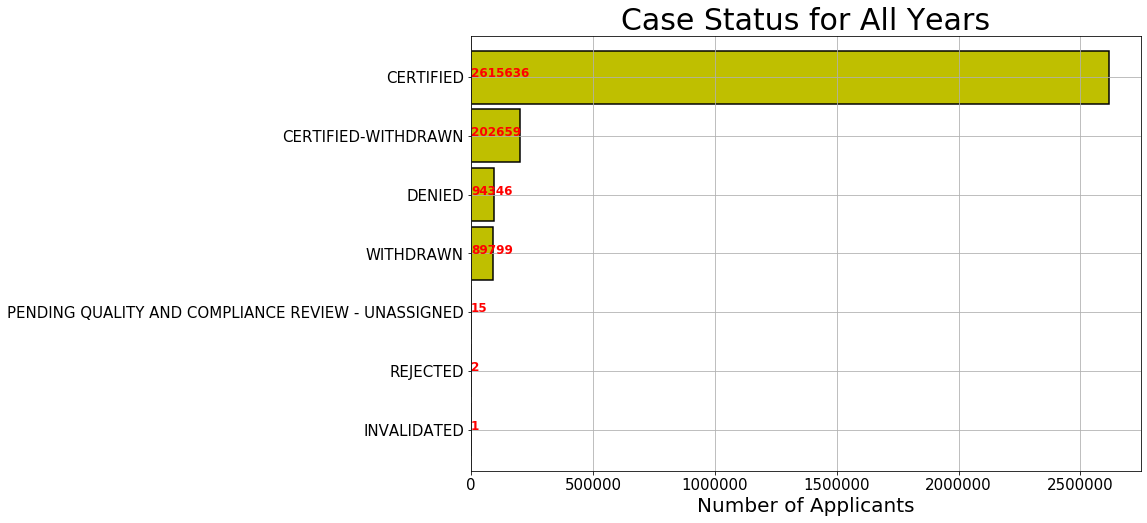

In [15]:
plt.figure(figsize=(12,8))
ax=df['CASE_STATUS'].value_counts().sort_values(ascending=True).plot.barh(width=0.9,color='y',edgecolor='k',linewidth=1.5)
for i, v in enumerate(df['CASE_STATUS'].value_counts().sort_values(ascending=True).values): 
    ax.text(.2, i, v,fontsize=12,color='r',weight='bold')
plt.title('Case Status for All Years',fontsize=30)
plt.xlabel('Number of Applicants',fontsize=20)
plt.tick_params(labelsize=15)
plt.grid()
plt.ioff()
plt.show()

In [16]:
#here we are going for binary classification hence we have converted remaining classes into either certified or denied.
import warnings
warnings.filterwarnings("ignore")
df.CASE_STATUS[df['CASE_STATUS']=='INVALIDATED'] = 'DENIED'
df.CASE_STATUS[df['CASE_STATUS']=='REJECTED'] = 'DENIED'
df.CASE_STATUS[df['CASE_STATUS']=='PENDING QUALITY AND COMPLIANCE REVIEW - UNASSIGNED'] = 'DENIED'
df.CASE_STATUS[df['CASE_STATUS']=='CERTIFIED-WITHDRAWN'] = 'CERTIFIED'

In [17]:
df["CASE_STATUS"].value_counts()

CERTIFIED    2818295
DENIED         94364
WITHDRAWN      89799
Name: CASE_STATUS, dtype: int64

In [18]:
#As WITHDRAWN category we can't to eiher certified or denied so drop rows with category withdrawn
df = df.drop(df[df.CASE_STATUS == 'WITHDRAWN'].index)

In [19]:
df["CASE_STATUS"].value_counts()  

CERTIFIED    2818295
DENIED         94364
Name: CASE_STATUS, dtype: int64

### Data visualization of Output Column:

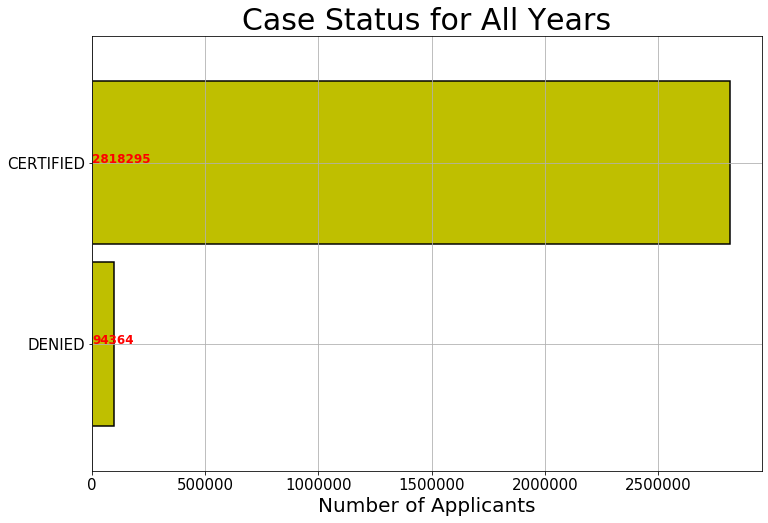

In [20]:
plt.figure(figsize=(12,8))
ax=df['CASE_STATUS'].value_counts().sort_values(ascending=True).plot.barh(width=0.9,color='y',edgecolor='k',linewidth=1.5)
for i, v in enumerate(df['CASE_STATUS'].value_counts().sort_values(ascending=True).values): 
    ax.text(.2, i, v,fontsize=12,color='r',weight='bold')
plt.title('Case Status for All Years',fontsize=30)
plt.xlabel('Number of Applicants',fontsize=20)
plt.tick_params(labelsize=15)
plt.grid()
plt.ioff()
plt.show()

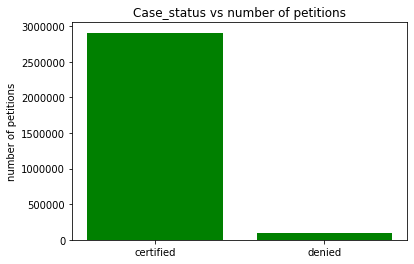

In [21]:
objects = ('certified','denied')
y_pos = np.arange(len(objects))
performance = [2908094,94364]

plt.bar(y_pos, performance, align='center',color= 'green')
plt.xticks(y_pos, objects)
plt.ylabel('number of petitions')
plt.title('Case_status vs number of petitions')

plt.show()

### Down sampling

In [22]:
from sklearn.utils import resample

In [23]:
# Separate majority and minority classes
df_majority = df[df.CASE_STATUS=='CERTIFIED']
df_minority = df[df.CASE_STATUS=='DENIED']
 
# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=156014,     # to match minority class
                                 random_state=123) # reproducible results
 
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
 
# Display new class counts
df_downsampled.CASE_STATUS.value_counts()

CERTIFIED    156014
DENIED        94364
Name: CASE_STATUS, dtype: int64

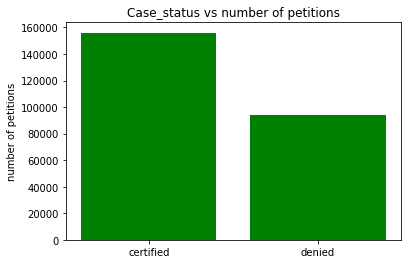

In [24]:
objects = ('certified','denied')
y_pos = np.arange(len(objects))
performance = [156014,94364]

plt.bar(y_pos, performance, align='center',color= 'green')
plt.xticks(y_pos, objects)
plt.ylabel('number of petitions')
plt.title('Case_status vs number of petitions')



plt.show()

### Distrubition of prevailing_wage to 6 categories

In [25]:
df_downsampled['PREVAILING_WAGE'].min()

0.0

In [26]:
df_downsampled['PREVAILING_WAGE'].max()

6997606720.0

In [27]:
df_downsampled['PREVAILING_WAGE'].mean()

889475.2720207047

In [28]:
df_downsampled.loc[df_downsampled['PREVAILING_WAGE'] <= 50000.0, 'WAGE'] = 'VERY LOW'
df_downsampled.loc[(df_downsampled['PREVAILING_WAGE'] > 50000.0) & (df_downsampled['PREVAILING_WAGE'] <= 70000.0), 'WAGE'] = 'LOW'
df_downsampled.loc[(df_downsampled['PREVAILING_WAGE'] > 70000.0) & (df_downsampled['PREVAILING_WAGE'] <= 90000.0), 'WAGE'] = 'MEDIUM'
df_downsampled.loc[(df_downsampled['PREVAILING_WAGE'] > 90000.0) & (df_downsampled['PREVAILING_WAGE'] <= 150000.0), 'WAGE'] = 'HIGH'
df_downsampled.loc[(df_downsampled['PREVAILING_WAGE'] > 150000.0) & (df_downsampled['PREVAILING_WAGE'] <= 200000.0), 'WAGE'] = 'VERY HIGH'
df_downsampled.loc[df_downsampled['PREVAILING_WAGE'] > 200000.0, 'WAGE'] = 'EXTREMELY HIGH'


print(df_downsampled)

        CASE_STATUS                              EMPLOYER_NAME  \
1022566   CERTIFIED                             TECHIZEE, INC.   
962549    CERTIFIED               CONNVERTEX TECHNOLOGIES INC.   
370678    CERTIFIED                      HQ TECH SOLUTIONS LLC   
1987954   CERTIFIED                     ERNST & YOUNG U.S. LLP   
2692234   CERTIFIED  WESTERMAN, HATTORI, DANIELS & ADRIAN, LLP   
...             ...                                        ...   
3002369      DENIED                             CUSTOMTBT, LLC   
3002378      DENIED               KEVIN PARK & ASSOCIATES, LTD   
3002383      DENIED                       IVERTIX INCORPORATED   
3002389      DENIED                  PROGRESSIVE SURFACE, INC.   
3002392      DENIED             PEI PARTNERSHIP ARCHITECTS LLP   

                                  SOC_NAME  \
1022566          COMPUTER SYSTEMS ANALYSTS   
962549                COMPUTER PROGRAMMERS   
370678   SOFTWARE DEVELOPERS, APPLICATIONS   
1987954           Accou

In [29]:
df_downsampled['WAGE'].unique()

array(['LOW', 'VERY LOW', 'MEDIUM', 'HIGH', 'VERY HIGH', 'EXTREMELY HIGH'],
      dtype=object)

In [30]:
df_downsampled.drop(columns = ['PREVAILING_WAGE'], inplace = True)

In [31]:
df_downsampled.info()
df_downsampled.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250378 entries, 1022566 to 3002392
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   CASE_STATUS         250378 non-null  object 
 1   EMPLOYER_NAME       250378 non-null  object 
 2   SOC_NAME            250378 non-null  object 
 3   JOB_TITLE           250378 non-null  object 
 4   FULL_TIME_POSITION  250378 non-null  object 
 5   YEAR                250378 non-null  float64
 6   WORKSITE            250378 non-null  object 
 7   WAGE                250378 non-null  object 
dtypes: float64(1), object(7)
memory usage: 17.2+ MB


(250378, 8)

In [32]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder 

In [33]:
lb=LabelEncoder()

df_downsampled['CASE_STATUS']=lb.fit_transform(df_downsampled['CASE_STATUS'])
df_downsampled['FULL_TIME_POSITION']=lb.fit_transform(df_downsampled['FULL_TIME_POSITION'])
df_downsampled['WAGE']=lb.fit_transform(df_downsampled['WAGE'])
df_downsampled['YEAR']=lb.fit_transform(df_downsampled['YEAR'])


df_downsampled['EMPLOYER_NAME']=lb.fit_transform(df_downsampled['EMPLOYER_NAME'])
df_downsampled['SOC_NAME']=lb.fit_transform(df_downsampled['SOC_NAME'])
df_downsampled['JOB_TITLE']=lb.fit_transform(df_downsampled['JOB_TITLE'])
df_downsampled['WORKSITE']=lb.fit_transform(df_downsampled['WORKSITE'])




In [34]:
df_downsampled

,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,YEAR,WORKSITE,WAGE
1022566,0,69147,243,9816,1,4,7067,2
962549,0,16522,228,9621,1,4,784,5
370678,0,32437,1229,19707,0,5,8213,2
1987954,0,23704,57,5201,1,2,6721,2
2692234,0,78008,788,36407,1,0,8069,5
...,...,...,...,...,...,...,...,...
3002369,1,18063,779,40819,1,0,4530,5
3002378,1,38797,57,361,1,0,374,5
3002383,1,36427,329,1815,1,0,8069,2
3002389,1,56493,1269,37731,1,0,2981,2


In [35]:
x = df_downsampled.iloc[:,1:8].values
x.shape

(250378, 7)

In [36]:
y = df_downsampled.iloc[:,0:1].values
y.shape

(250378, 1)

In [37]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)